# 浅层神经网络

## 1. 神经网络总览

在上一节我们介绍了逻辑回归的计算过程，将多个逻辑回归的sigmoid单元融合起来，就成为了一个非常简单的神经网络。

下图中，每个圆圈所代表的神经元，包含了线性组合（$w^Tx+b$）以及激活函数激活（$\sigma(z)$）两个计算步骤。

为了方便计算，在神经网络中，每一层的权重会形成一个矩阵 $W$（而不再是向量 $w$），一个截距向量 $b$（而不再是截距标量 $b$）。用方括号上标 $[i]$ 表示第 $i$ 层对应的参数。习惯上，输入层不计入神经网络的层数（也可以把输入层看做是第 $0$ 层）。下图表示了一个两层的神经网络及其对应的参数。

整个计算过程，也是往复的前向传播和后向传播过程。

![What is a neural network](img/What is a Neural Network.png)

## 2. 神经网络的表示

输入层、隐藏层、输出层。在监督学习的环境中，输入层和输出层的数据是已有的，而隐藏层是无法观测到的变量。每一层的值可以用 $a^{[l]}$ 来表示，$a$ 代表激活activation，是本层的输出，同时也是给定到下一层的输入。模型的输入 $X$ 可以看做是 $a^{[0]}$。

![Neural Network Representation](img/Neural Network Representation.png)

## 3. 神经网络的计算过程



上面说到，逻辑回归的过程，其实就是一个神经元，包含线性组合和激活函数激活两个步骤。而神经网络的计算过程，可以看做是重复计算多次逻辑回归。

![Computing a Neural Network's Output 1](img/Computing a Neural Network's Output 1.png)
![Computing a Neural Network's Output 2](img/Computing a Neural Network's Output 2.png)

重复计算的过程，如果使用for循环来写，会十分低效。事实上，将每一层每个神经元的权重向量组合为权重矩阵，将截距标量组合为截距向量，可以大幅简化计算。
![Computing a Neural Network's Output 3](img/Computing a Neural Network's Output 3.png)

在这个两层的神经网络中，完成对隐藏层的计算后，最终计算输出层，就又回到了一个四个特征的逻辑回归模型。
![Computing a Neural Network's Output 4](img/Computing a Neural Network's Output 4.png)

## 4. 针对多个训练样本的向量化

在上面的图中，$x_1$, $x_2$ 等都是标量，也即单个实数。当有 $m$ 个训练样本时，上面的计算可能需要重复计算 $m$ 次。但通过将 $x_1$ 转为一个 $m$ 维的向量，将 $[x_1, x_2, x_3]$ 向量转为一个 $n \times m$ 的矩阵，其他保持不变，可以避免for循环。

![Vectorizing across multiple examples](img/Vectorizing across multiple examples.png)

## 5. 向量化实现的解释

![Explanation for vectorized implementation](img/Explanation for vectorized implementation.png)

## 6. 激活函数

神经元的计算过程中，激活函数的选择可以是不仅限于sigmoid函数的其它非线性函数。

**tanh函数（双曲函数）在实践中几乎总是比sigmoid函数更好**，尤其在当数据做了标准化均值为 $0$ 的情况。$tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$，tanh函数其实是sigmoid函数拉伸并偏移之后的版本，其值域是 $(-1, 1)$。

实际情况中，**神经网络几乎从不使用sigmoid函数作为激活函数**。唯一的例外是输出层，当需要输出 $(0, 1)$ 区间内的值，最终输出层的激活函数会是sigmoid函数。

tanh函数和sigmoid函数的一个共同缺陷，是当 $z$ 的绝对值非常大的情况下，两个函数的梯度绝对值都会非常小，导致梯度下降的学习缓慢。为应对这个问题，在神经网络中非常流行的做法是使用ReLU函数（线性整流函数）。$ReLU(z) = \max(0, z)$。ReLU函数大于0时梯度固定，小于0时梯度为0。其在0点的导数理论上不存在，但由于计算机的浮点数可以认为永远不等于0，所以在实际中并不影响。**ReLU函数几乎已经成为了目前神经网络的默认激活函数。**

ReLU函数的缺陷是，当 $z<0$ 时梯度为0，在实际中这点没有太大影响。但为了解决这个问题，也有人提出了Leaky ReLU（带泄露整流函数）。Leaky ReLU在 $z<0$ 时，会分配一个非常小的梯度。**Leaky ReLU的理论效果会强于ReLU，但实际中还是ReLU的使用更为广泛**。

ReLU和Leaky ReLU的共同有点是，对于绝大多数的点，梯度都相对比0大得多，这样算法的学习速度会比tanh函数和sigmoid函数快。

![Activation functions](img/Activation functions.png)

## 7. 为什么神经网络需要非线性的激活函数

如果去除神经元中的激活函数（或使用线性的激活函数），那么无论神经网络有多少层，最终的输出层都只会是输入层的线性组合。如果隐藏层使用线性激活函数，而最终的输出层使用sigmoid激活函数，那么这个模型就等同于逻辑回归。

唯一可能会使用线性激活函数的情境，是当使用神经网络进行回归模型训练时，在最终的输出层上可能会使用线性激活函数（隐藏层依然是非线性的激活函数）。

## 8. 激活函数的导数

在对神经网络的成本函数计算梯度的过程中，会需要对激活函数计算导数。

![Sigmoid activation function](img/Sigmoid activation function.png)
![Tanh activation function](img/Tanh activation function.png)
![ReLU and Leaky ReLU](img/ReLU and Leaky ReLU.png)

## 9. 神经网络的梯度下降过程

神经网络的梯度下降，和传统机器学习算法的过程非常类似。定义初始化参数 -> 根据模型进行计算预测结果 -> 根据预测结果和实际标签计算成本函数 -> 成本函数计算梯度 -> 使用梯度下降更新参数。重复整个流程直到梯度下降收敛。

![Gradient descent for neural networks](img/Gradient descent for neural networks.png)

初始化参数的方法后面会讲，在神经网络中需要随机初始化，按照0值来初始化会有问题；根据模型进行计算预测结果，就是前向传播的过程；成本函数则依据是回归（e.g. MSE）还是分类（e.g. Logloss）问题而定；梯度下降的过程，和传统机器学习算法完全一致；那么唯一的问题就是，如果计算神经网络的梯度，神经网络梯度的计算过程，就是反向传播。

下面这张图直接给出了两层神经网络的梯度计算公式。

![Formulas for computing derivatives](img/Formulas for computing derivatives.png)

## 10. 反向传播

反向传播实际上还是求解偏导，神经网络求解偏导的过程之所以复杂，主要还是在于其求偏导的过程，需要应用矩阵微积分。

TODO

## 11. 随机初始化

上面提到，在训练神经网络时，参数的随机初始化极其重要。逻辑回归的参数可以初始化为0，但如果神经网络的所有参数都初始化为0，梯度下降算法将无法正常运算。

实际上截距项初始化为0是没问题的，会影响梯度下降过程的主要是将权重项初始化为0。当权重全部为0时，同一层的神经元，前向传播过程中其激活值会完全相同。而进行反向传播时，梯度也会相同。梯度下降一次迭代更新后，权重矩阵的每一行都会是相同的。继续循环下去，每一层各个神经元的激活值还是相同，神经网络成为多个相同神经元的叠加，就失去了意义。

![What happens if you initialize weights to zero?](img/What happens if you initialize weights to zero.png)

解决方案是对权重进行随机初始化（截距项依然可以按照0值进行初始化）。在实际操作中，通常将权重初始化为非常接近0的随机数，这样当使用tanh函数或sigmoid函数作为激活函数时，其梯度会相对比较大，梯度下降收敛的速度会快一些。

![Random initialization](img/Random initialization.png)

## 12. Show Me The code

在这里，我们将构建一个包含一层隐藏层的神经网络。我们会注意到，这个浅层神经网络模型和之前的逻辑回归有着巨大的差别。

**通过这个编程练习，可以学到：**
- 实现一个包含单一隐藏层的二分类神经网络
- 使用非线性函数（例如tanh）作为激活函数的神经元
- 计算交叉熵损失
- 实现前向传播和后向传播

### 12.1 三方包

首先，运行下面的代码块，来引入在这个编程练习中所需要的包。 
- [numpy](www.numpy.org) 是Python生态圈中进行科学计算的基础包。
- [sklearn](http://scikit-learn.org/stable/) 是Python生态区中一个简单而高效地处理数据挖掘和数据分析的工具包
- [matplotlib](http://matplotlib.org) 是Python生态圈中著名的绘图包。
- testCases 提供了一些测试用例，用来测试所写函数的准确性
- planar_utils 提供了一些在练习中会用到的实用函数

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

### 12.2 数据集

首先，我们看一下数据集。下面的代码块会载入一批鲜花的二分类数据集到变量 `X` 和 `Y` 中。

In [2]:
X, Y = load_planar_dataset()

使用matplotlib对数据集进行可视化。数据看起来像是鲜花，有一些红色的点（标签 y=0）和一些蓝色的点（y=1）。我们的目标是构造一个模型，来拟合这些数据。

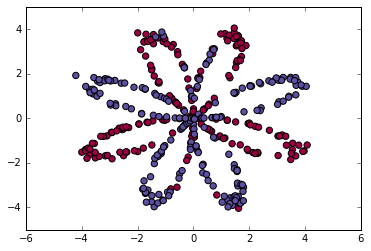

In [3]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

现在有:
    - 一个numpy数组类型的矩阵 X 包含着特征 (x1, x2)
    - 一个numpy数组类型的向量 Y 包含着标签 (红色:0, 蓝色:1).

首先我们来看一下数据长什么样。

**练习**：查看我们有多少个训练样本。另外，`X` 和 `Y` 的 `shape` 是什么样的？ 

In [4]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


**预期输出**:
       
<table style="width:20%">
  
  <tr>
    <td>**shape of X**</td>
    <td> (2, 400) </td> 
  </tr>
  
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td> 
  </tr>
  
    <tr>
    <td>**m**</td>
    <td> 400 </td> 
  </tr>
  
</table>

### 12.3 简单的逻辑回归

在构造神经网络之前，我们首先来看一下逻辑回归在这个分类问题上的表现。我们可以使用sklearn中自带的函数来进行逻辑回归。执行下面的代码块，对已有数据训练一个逻辑回归分类器。

In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/home/hujunwei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


/home/hujunwei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/hujunwei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


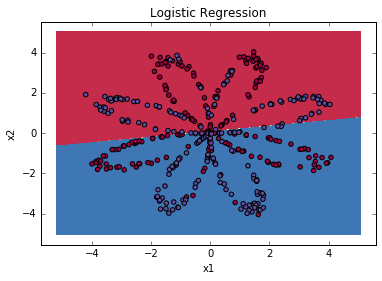

In [6]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# # Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**预期输出**:

<table style="width:20%">
  <tr>
    <td>**Accuracy**</td>
    <td> 47% </td> 
  </tr>
  
</table>


**解释**：这个数据集是线性不可分的，所以逻辑回归的表现不佳。神经网络应该会表现得更好。

### 12.4 神经网络模型

逻辑回归在“鲜花数据集”上表现不好，接下来，我们会训练一个包含单一隐藏层的神经网络。

**我们的模型表示如下**:
<img src="img/classification_kiank.png" style="width:600px;height:300px;">

**数学表示**:

对于一个样本 $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

给定所有样本的预测值，就可以计算成本 $J$ ：
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**回顾**: 构建神经网络的整个步骤大致为:
    1. 定义神经网络的结构（有多少个输入单元，多少个隐藏单元等）
    2. 初始化模型的参数
    3. 循环:
        - 实现前向传播
        - 计算损失
        - 实现后向传播，获得梯度
        - 更新参数（梯度下降）

通过我们会构建一系列辅助函数来计算上面三个步骤，之后再将其合并到一个函数，我们叫做 `nn_model()`。有了 `nn_model()` 并学得了正确的参数之后，就可以对新数据进行预测。

#### 12.4.1 定义神经网络的结构

**练习**: 定义三个变量:
    - n_x: 输入层的大小
    - n_h: 隐藏层的大小（按照上图的结构，设置为4）
    - n_y: 输出层的大小

**提示**: 使用 X 和 Y 的shape 来确定 n_x 和 n_y。同时，硬编码 n_h 为4.

In [7]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [8]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


**预期输出** 

<table style="width:20%">
  <tr>
    <td>**n_x**</td>
    <td> 5 </td> 
  </tr>
  
    <tr>
    <td>**n_h**</td>
    <td> 4 </td> 
  </tr>
  
    <tr>
    <td>**n_y**</td>
    <td> 2 </td> 
  </tr>
  
</table>

#### 12.4.2 初始化模型的参数

**练习**: 实现函数 `initialize_parameters()`.

**注意事项**:
- 确保参数的维度正确，需要的话可以参考上面的图片。
- 权重矩阵需要初始化为随机值
    - 使用: `np.random.randn(a,b) * 0.01` 来随机初始化维度为 (a,b) 的矩阵。
- 截距向量初始化为0. 
    - 使用: `np.zeros((a,b))` 来初始化维度为 (a,b) 全零矩阵。

In [9]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[ 0.]]


**预期输出**:

<table style="width:90%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]] </td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01057952 -0.00909008  0.00551454  0.02292208]]</td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>



#### 12.4.3 循环

**练习**: 实现 `forward_propagation()`.

**注意事项**:
- 回顾上面关于我们这个神经网络分类器的数学表述
- 可以使用已经引入的函数 `sigmoid()`
- 可以使用numpy自带的函数 `np.tanh()`
- 实现的步骤如下:
    1. 从字典 "parameters" 中获取各个参数（"parameters" 是函数 `initialize_parameters()` 的输出）
    2. 实现前向传播。计算 $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (训练集中所有训练样本预测值构成的向量).
- 后向传播中需要的值都保存在 "`cache`" 中。`cache` 会作为后向传播函数的一个输入值。

In [11]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [12]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.262818640198 0.091999045227 -1.30766601287 0.212877681719


**预期输出**:
<table style="width:50%">
  <tr>
    <td> 0.262818640198 0.091999045227 -1.30766601287 0.212877681719 </td> 
  </tr>
</table>

现在我们已经计算出了 $A^{[2]}$ (保存在Python变量 "`A2`" 中), 它包含了对每个训练样本的 $a^{[2](i)}$ ，接下来我们可以计算成本函数：

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**练习**: 实现 `compute_cost()` 来计算成本 $J$.

**注意事项**:
- 有很多方法来计算交叉熵损失，下面是其中一种用于计算
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(可以先使用 `np.multiply()` 之后再计算 `np.sum()`，或者也可以直接使用 `np.dot()`)。

In [13]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = -np.mean(logprobs)
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [14]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.693058761039


**预计输出**:
<table style="width:20%">
  <tr>
    <td>**cost**</td>
    <td> 0.693058761... </td> 
  </tr>
  
</table>

使用前向传播过程中的缓存，我们可以实现后向传播。

**练习**: 实现函数 `backward_propagation()`.

**注意事项**:
后向传播通常是深度学习中最难的部分（从数学推导而言）。这里我们列出了后向传播的公式，由于要进行向量化实现，请使用下面右边的六个等式。

<img src="img/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - 要计算 dZ1 首先需要计算 $g^{[1]'}(Z^{[1]})$. 由于 $g^{[1]}(.)$ 是tanh激活如数，如果 $a = g^{[1]}(z)$ 那么 $g^{[1]'}(z) = 1-a^2$. 所以可以按照使用 `(1 - np.power(A1, 2))` 来计算 $g^{[1]'}(Z^{[1]})$ 

In [15]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [16]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**预计输出**:



<table style="width:80%">
  <tr>
    <td>**dW1**</td>
    <td> [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]] </td> 
  </tr>
  
  <tr>
    <td>**db1**</td>
    <td>  [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]] </td> 
  </tr>
  
  <tr>
    <td>**dW2**</td>
    <td> [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]] </td> 
  </tr>
  

  <tr>
    <td>**db2**</td>
    <td> [[-0.16655712]] </td> 
  </tr>
  
</table>  

**练习**: 实现梯度下降的参数更新。我们需要使用 (dW1, db1, dW2, db2) 来更新 (W1, b1, W2, b2).

**梯度下降的基本原则**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ 其中 $\alpha$ 是学习速率而 $\theta$ 表示其中的一个参数。

**解释**: 梯度下降算法中好的学习速率 (收敛)和不好的学习速率 (发散). 

<img src="img/sgd.gif" style="width:400;height:400;"> <img src="img/sgd_bad.gif" style="width:400;height:400;">



In [17]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[ 0.00010457]]


**预期输出**:


<table style="width:80%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01041081 -0.04463285  0.01758031  0.04747113]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.00010457]] </td> 
  </tr>
  
</table>  

#### 12.4.4 将12.4.1, 12.4.2 和 12.4.3 集成到 nn_model()

**练习**: 在函数 `nn_model()` 中构建神经网络模型。

**注意事项**: 神经网络模型需要正确地调用前面实现的函数。

In [19]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [20]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000218
Cost after iteration 2000: 0.000107
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000042
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000026
Cost after iteration 9000: 0.000023
W1 = [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[ 0.20459656]]


**预期输出**:

<table style="width:90%">

<tr> 
    <td> 
        **cost after iteration 0**
    </td>
    <td> 
        0.692739
    </td>
</tr>

<tr> 
    <td> 
        <center> $\vdots$ </center>
    </td>
    <td> 
        <center> $\vdots$ </center>
    </td>
</tr>

  <tr>
    <td>**W1**</td>
    <td> [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-2.45566237 -3.27042274  2.00784958  3.36773273]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.20459656]] </td> 
  </tr>
  
</table>  

#### 12.4.5 预测

**练习**: 构造predict()函数，调用模型通过前向传播进行预测。

**回顾**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  

In [21]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    ### END CODE HERE ###
    
    return predictions

In [22]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.666666666667


**预期输出**: 


<table style="width:40%">
  <tr>
    <td>**predictions mean**</td>
    <td> 0.666666666667 </td> 
  </tr>
  
</table>

接下来我们看看在实际的“鲜花数据集”中模型的表现情况。

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219471
Cost after iteration 9000: 0.218612


/home/hujunwei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/hujunwei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


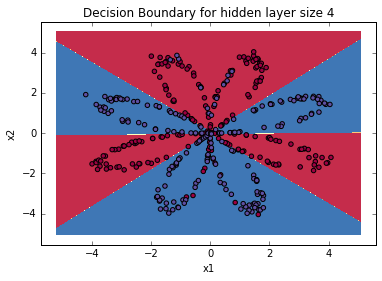

In [23]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [24]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


**预期输出**: 

<table style="width:15%">
  <tr>
    <td>**Accuracy**</td>
    <td> 90% </td> 
  </tr>
</table>

相比逻辑回归，准确率明显高很多。这个模型学得了关于鲜花花瓣的模式。和逻辑回归不同，神经网络可以学习到更加非线性的决策边界。

下面我们试着改变隐藏层的神经元数量。

#### 12.4.6 隐藏层神经元数量调节

运行下面的代码块。你会看到模型在单一隐藏层不同神经元数量时的表现情况。

/home/hujunwei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/hujunwei/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.25 %


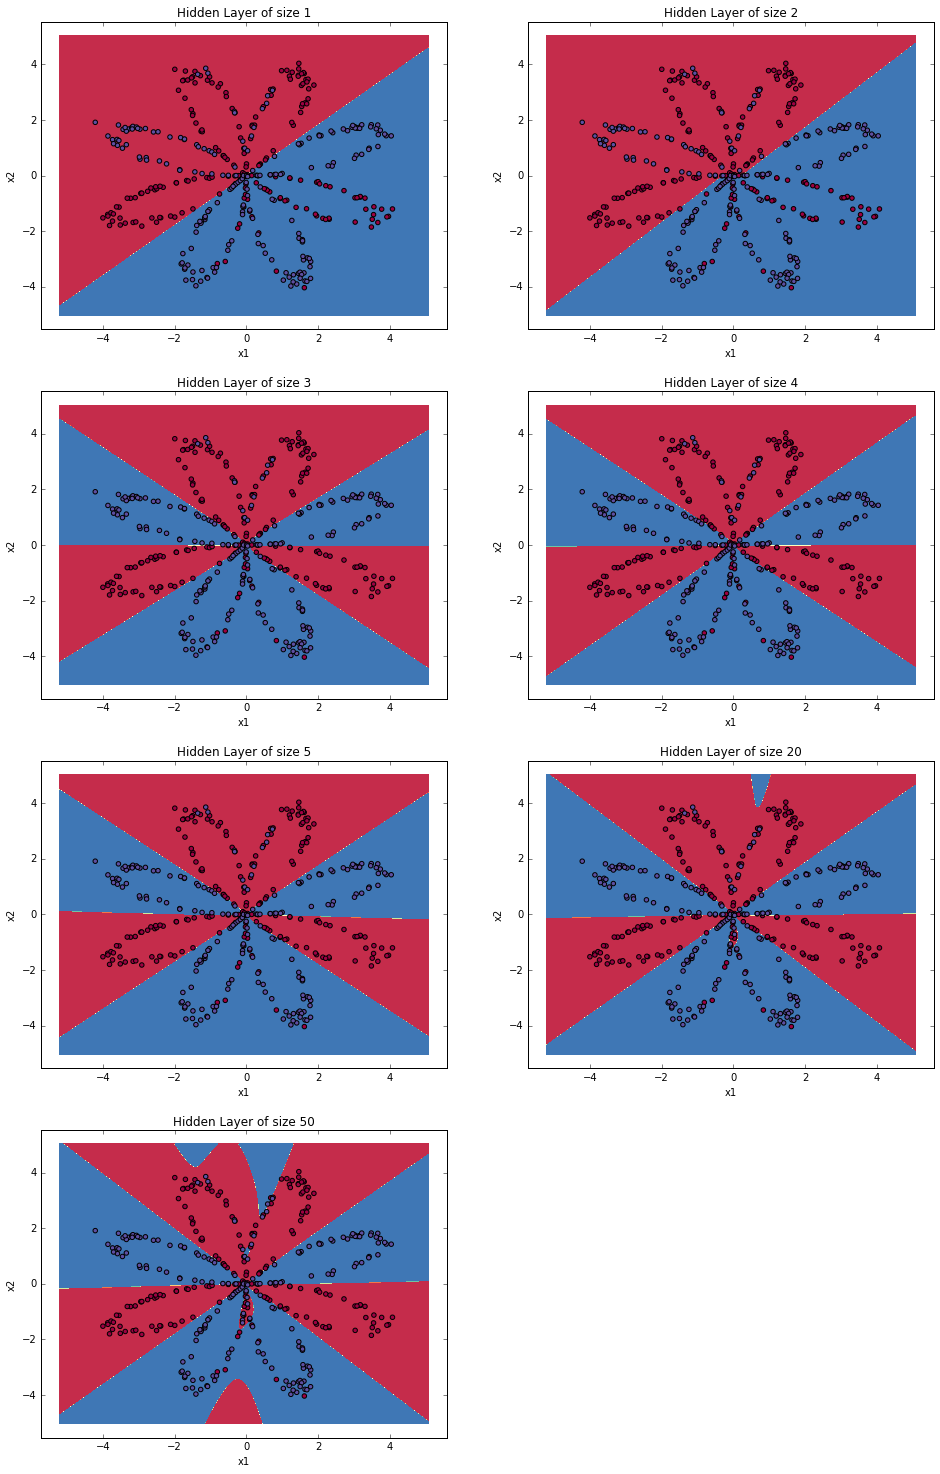

In [25]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**解释**:
- 更大的模型（具备更多的隐藏神经元）可以更好地你和训练数据，而最终最大的模型对数据产生了过拟合。 
- 最佳的隐藏层神经元数量是 n_h = 5. 在这个数值下，模型对数据拟合较好，似乎也没有明显的过拟合。
- 后面我们会学习正则化，正则化使得我们可以使用更大的模型（比如 n_h = 50），同时又免于过拟合。

**可选的思考题**:

- 如果把激活函数由tanh改为sigmoid或ReLU，会有什么不同？
- 调整学习速率，看情况会有什么变化？
- 如果使用了新数据，模型的表现会怎么样？